# Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/datasetspotify.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
df.head()

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
df.columns = df.columns.str.lower().str.strip()

In [7]:
# Revisar duplicados.
df[df.duplicated()]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [8]:
# Verificar valores nulos
print(df.isnull().sum())

index               0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [27]:
# Comenzamos viendo los null de country, city y district.
df[df["artists"].isna() | df["album_name"].isna() | df["track_name"].isna()]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [28]:
# Eliminar NaN
df.dropna(inplace=True)

In [29]:
# Verificar valores nulos
print(df.isnull().sum())

index               0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,113999.0,56999.421925,32909.243463,0.000,28499.5000,56999.000000,85499.5000,113999.000
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996


In [11]:
df.dtypes

,0
index,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [22]:
df.columns = df.columns.str.lower().str.strip()

In [23]:
# Revisar duplicados.
df[df.duplicated()]

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [38]:
df = df.drop(columns=['index'])

# Diagnóstico y Selección de Problema:
# 1.- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.


In [39]:
# Agrupamos para buscar parámetros Outlinear.
df.groupby(["duration_ms"]).size()

,0
duration_ms,
8586,1
13386,1
15800,1
17453,1
17826,2
...,...
4447520,1
4563897,1
4730302,1


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Tipos de generos
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [41]:
df_generos_populares =  df.groupby(['track_genre'])['popularity'].mean().sort_values()
df_generos_populares.tail()

,popularity
track_genre,
grunge,49.594000
sad,52.379000
chill,53.651000
k-pop,56.952953
pop-film,59.283000


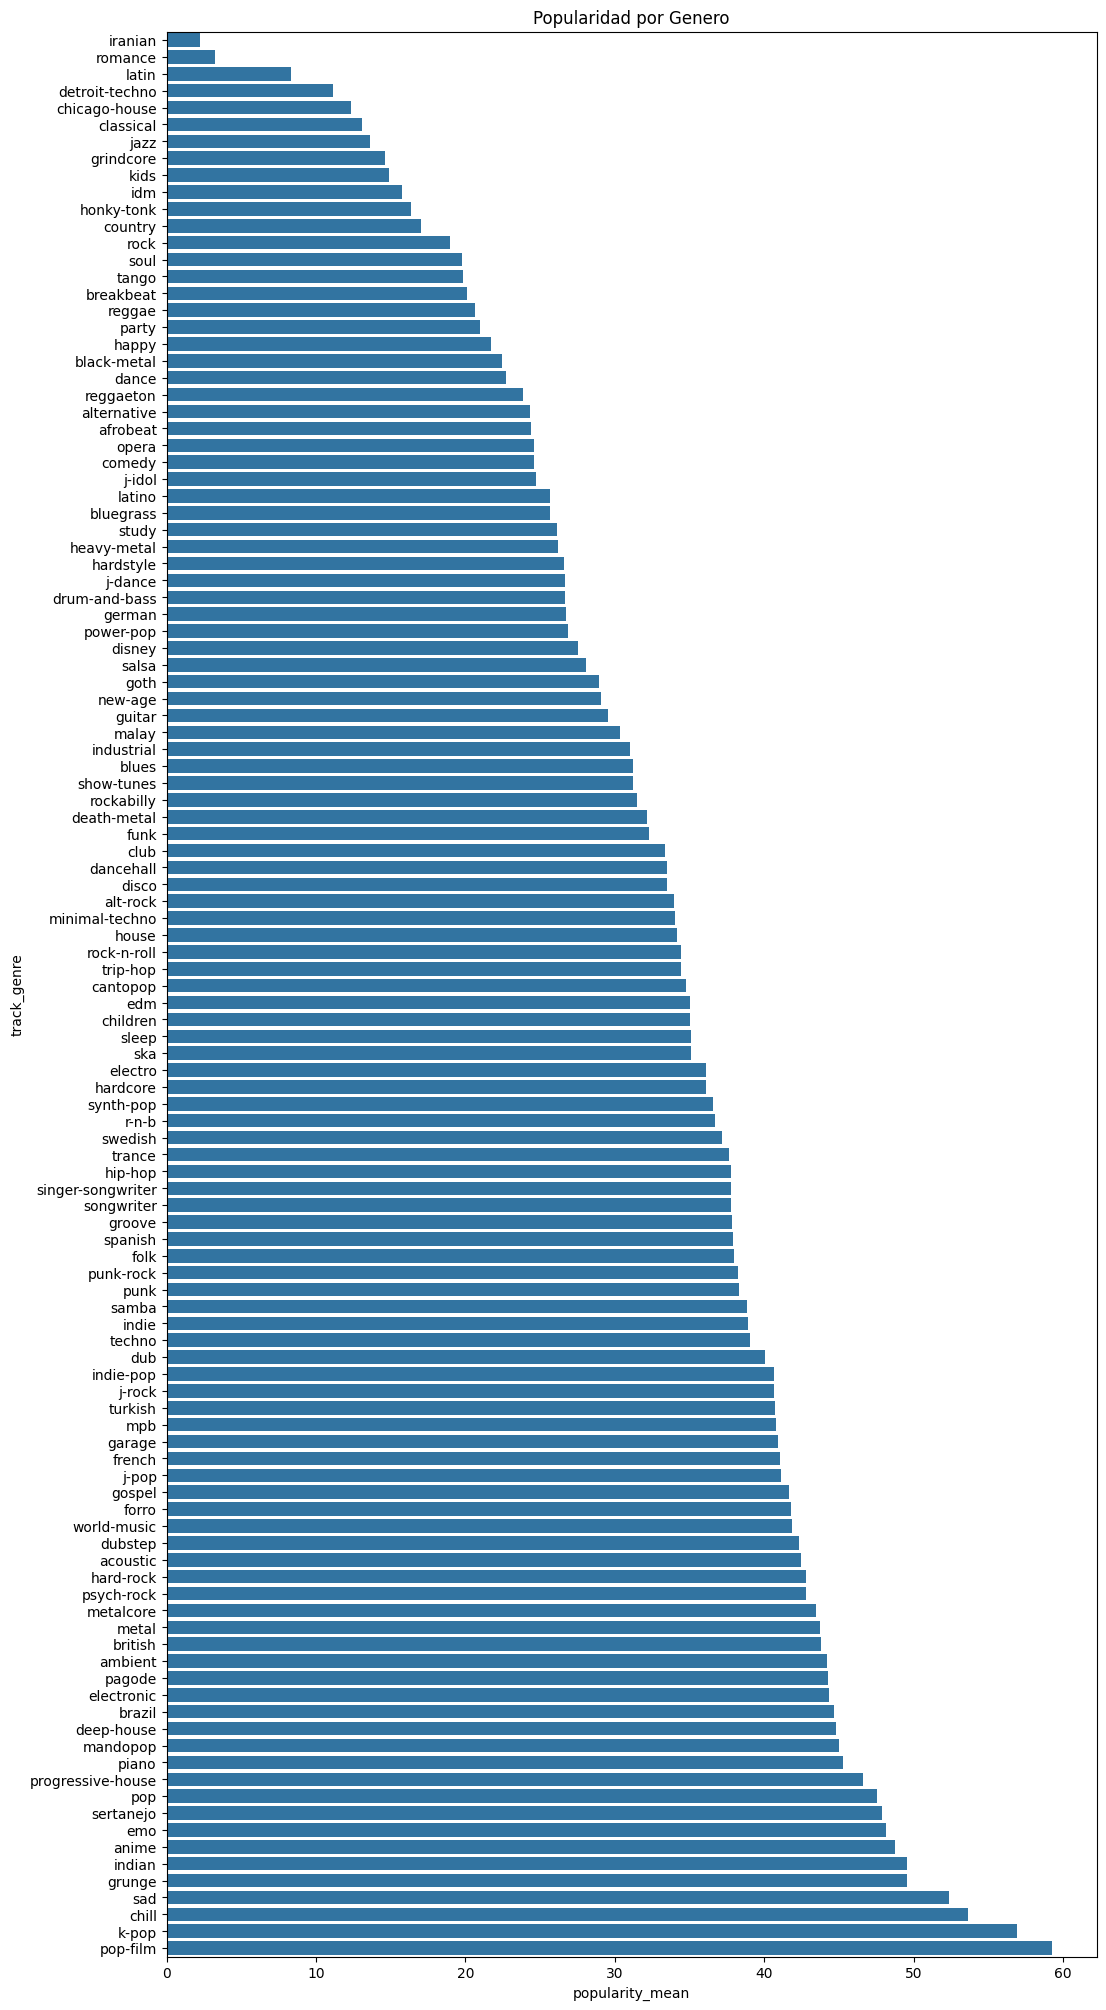

In [54]:
plt.figure(figsize=(12, 25))

# Convert the Series to a DataFrame
genre_popularity_df = df_generos_populares.reset_index()
genre_popularity_df.columns = ['track_genre', 'popularity_mean']

sns.barplot(data=genre_popularity_df, x='popularity_mean', y='track_genre')
plt.title("Popularidad por Genero")
plt.show()

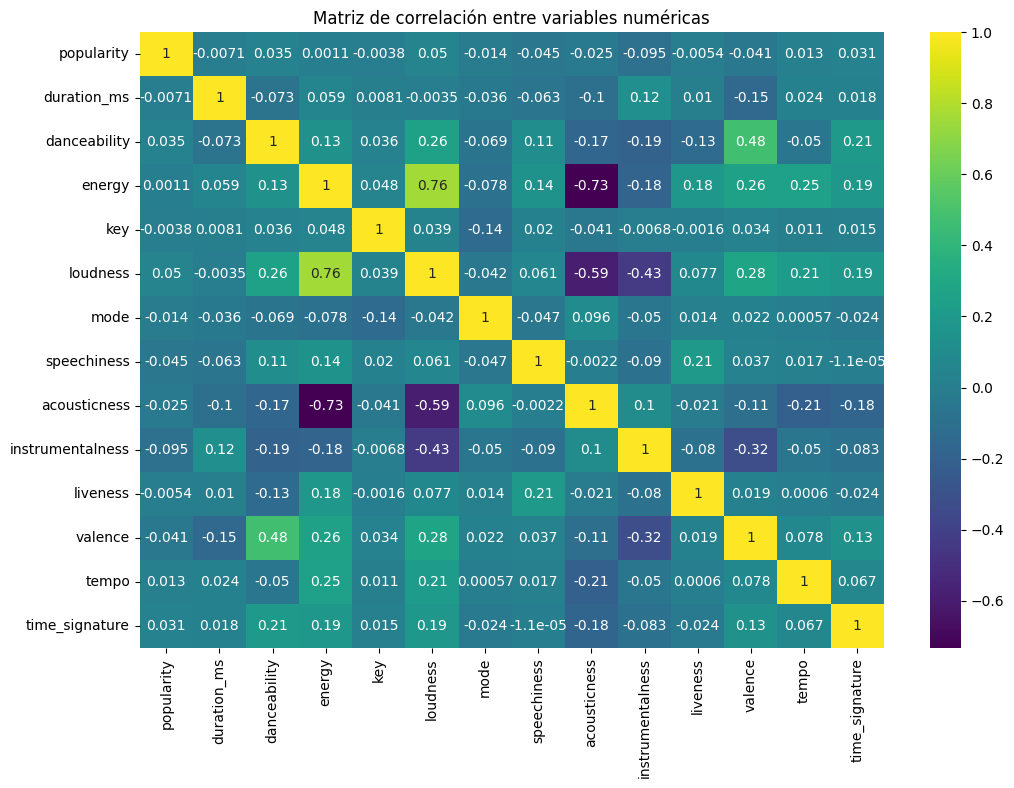

In [42]:
# Correlación numérica generadas con las columnas númericas
num_df = df.select_dtypes(include=[np.number])
correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

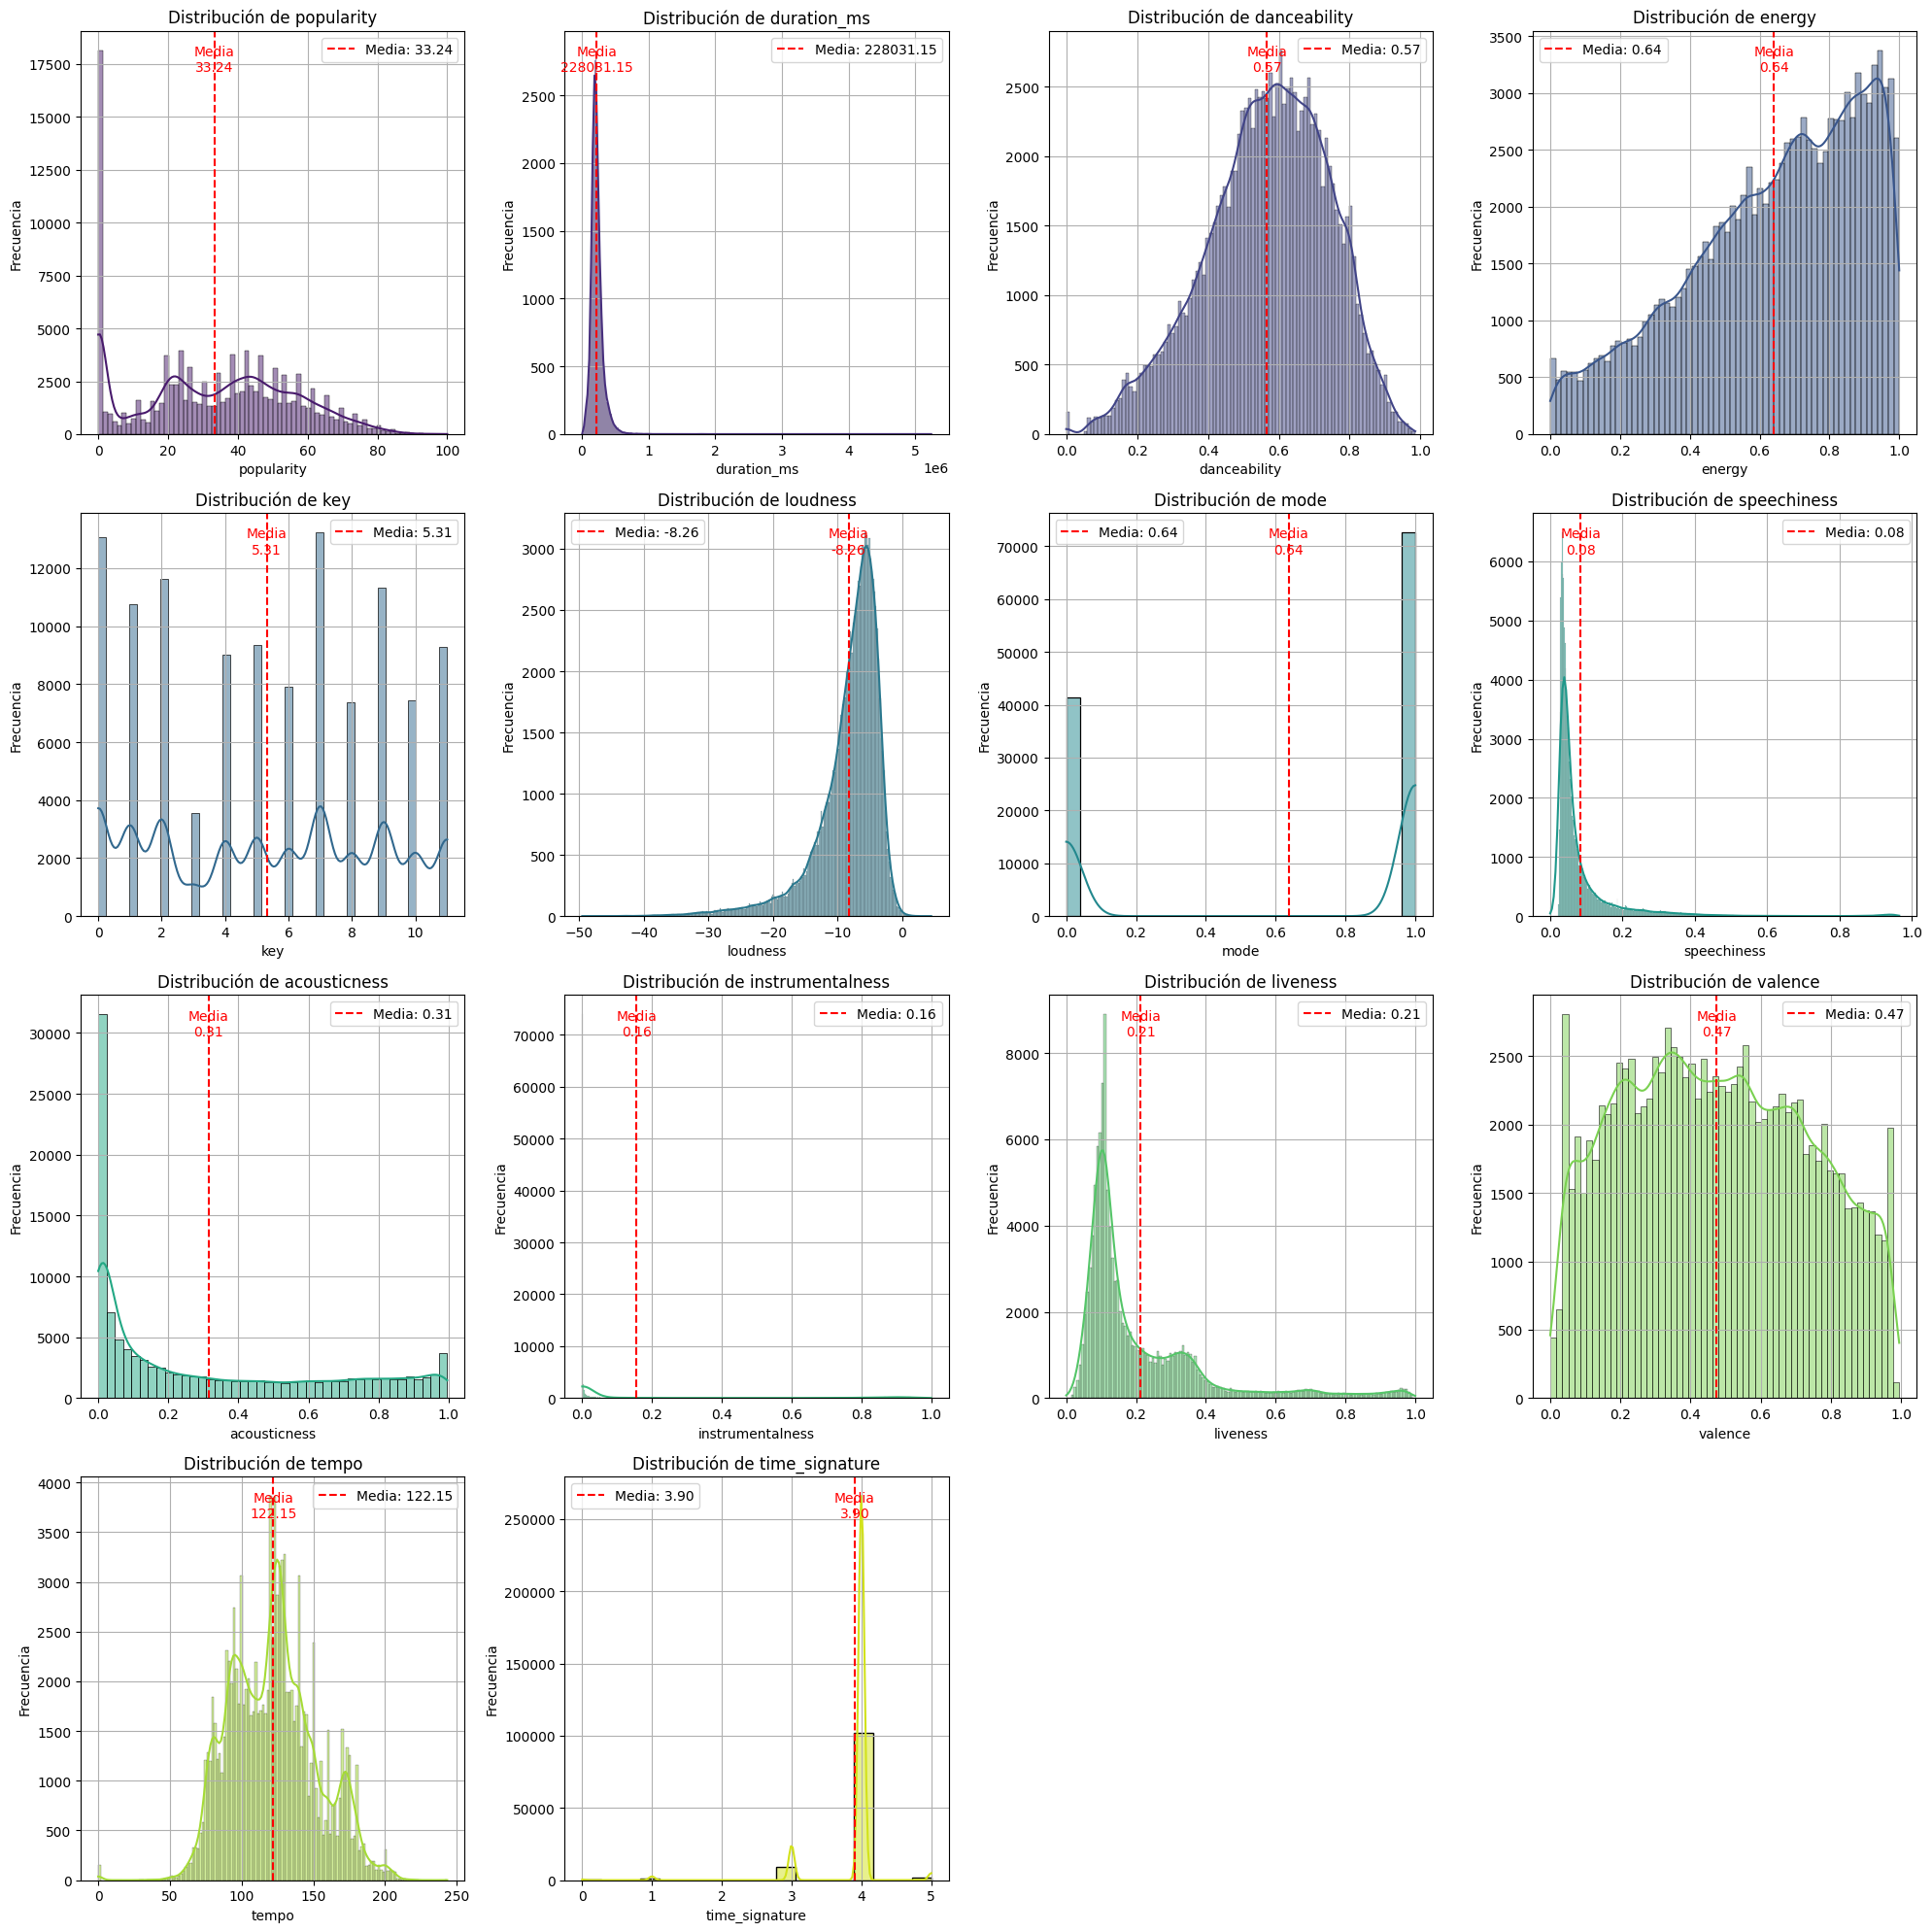

In [79]:
import matplotlib.pyplot as plt # Ensure plt is available
import seaborn as sns # Ensure seaborn is available

# generar un cor diferente para cada grafico
colors = sns.color_palette("viridis", len(num_df.columns))

# Create a grid of subplots
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

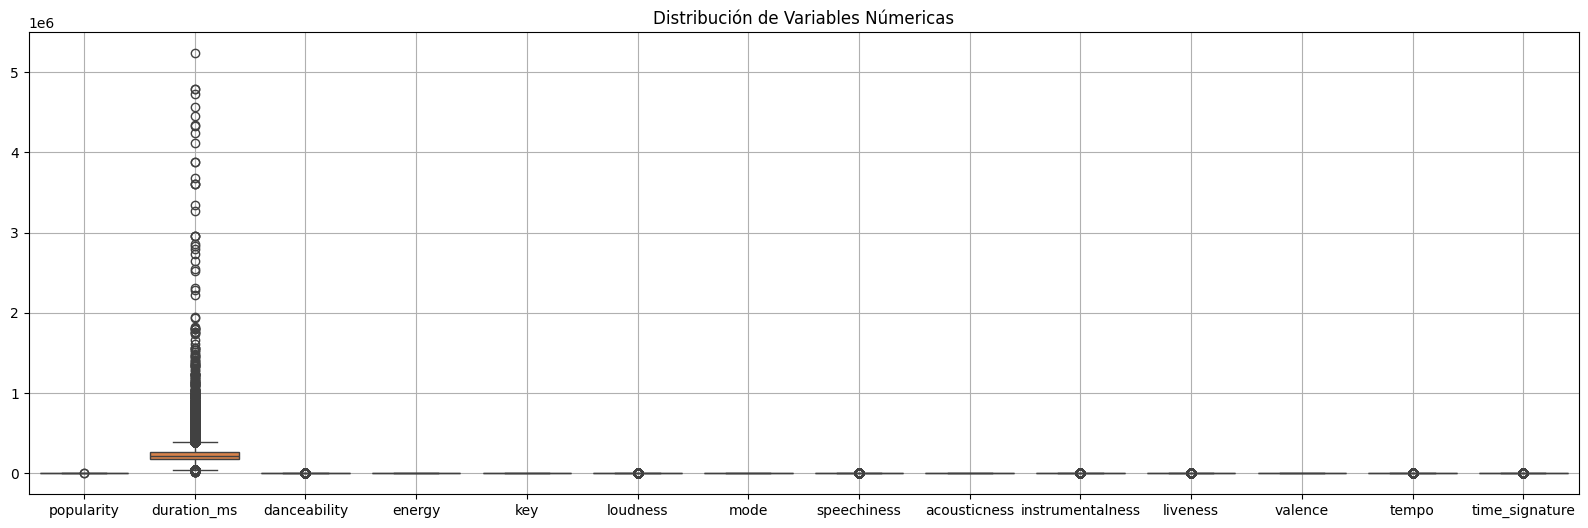

In [44]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

# 2.- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).



In [55]:
# Variables categóricas y numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:", cat_cols)
print("\nVariables numéricas:", num_cols)


Variables categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Variables numéricas: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [58]:
# Variables numéricas
num_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']  # ajusta según columnas reales

# Variables categóricas
cat_features = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Features finales
X = df[num_features + cat_features]
y = df['popularity']

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.tree import DecisionTreeRegressor # Importar DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [61]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [62]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Regresion Lineal**

In [63]:
# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar
pipeline.fit(X_train, y_train)

# Evaluar
score = pipeline.score(X_test, y_test)


R^2 Score: 0.834


In [66]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")

MSE: 82.16
RMSE: 9.06
R^2: 0.834


**Árbol desición**

In [67]:
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [76]:
# Pipeline con DecisionTreeRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)) # Cambiado a DecisionTreeRegressor
])

In [77]:
# Entrenar el modelo de Árbol de Decisión
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration_ms',
                                                   'danceability', 'energy',
                                                   'key', 'loudness', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'time_signature']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['track_id', 'artists',
                                                   'album_name', 'track_name',
                                                   'track_genre'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [78]:
# Predecir en test
y_pred = pipeline.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")

MSE: 310.15
RMSE: 17.61
R^2: 0.375


3.- Justificar la elección del problema y explicar por qué es relevante y desafiante.

## Diagnóstico y Selección de Problema

Basándonos en el Análisis Exploratorio de Datos (EDA) inicial realizado en el conjunto de datos de Spotify, podemos diagnosticar las siguientes características principales y desafíos:

**Características Principales:**

*   El dataset contiene información sobre una gran cantidad de pistas de música (más de 114,000 entradas).
*   Incluye una variedad de características numéricas que describen aspectos musicales como la bailabilidad, energía, sonoridad, tempo, etc.
*   También contiene características categóricas importantes como el nombre del artista, el nombre del álbum, el nombre de la pista y el género de la pista.
*   La columna `popularity` es una variable numérica que parece ser una métrica clave para entender el éxito o la recepción de una pista.
*   Se identificó y manejó un pequeño número de valores nulos en columnas clave (`artists`, `album_name`, `track_name`), lo cual es positivo para la calidad de los datos.
*   No se encontraron filas completamente duplicadas.
*   La distribución de la popularidad muestra una concentración en valores más bajos, con algunas pistas que tienen popularidad muy alta.
*   Se observaron posibles outliers en varias variables numéricas como `duration_ms`, `loudness`, `speechiness`, `instrumentalness`, y `tempo`, lo cual es común en datasets del mundo real.
*   La matriz de correlación mostró algunas relaciones entre variables numéricas, aunque no hay correlaciones extremadamente altas que sugieran multicolinealidad severa entre las características musicales en general (excluyendo la correlación perfecta con el `index` original que ya eliminamos).
*   Existe una amplia variedad de géneros (`track_genre`) representados en el dataset, lo cual es útil para análisis segmentados.

**Desafíos del Dataset:**

*   La presencia de outliers en varias variables numéricas podría influir en algunos modelos de machine learning. Será importante decidir cómo manejar estos outliers (investigar, transformar, eliminar, etc.).
*   Las variables categóricas como `track_id`, `artists`, `album_name`, y `track_name` tienen una cardinalidad muy alta (muchos valores únicos), lo que puede ser un desafío para la codificación (por ejemplo, One-Hot Encoding) y podría llevar a un gran número de características si no se manejan adecuadamente.
*   La variable `popularity` tiene una distribución sesgada hacia valores bajos, lo que podría requerir técnicas de modelado que manejen bien distribuciones no normales o considerar transformaciones.
*   La relación entre las características musicales y la popularidad no parece ser lineal directa, como sugiere la matriz de correlación (aunque la correlación lineal solo captura un tipo de relación).

---

### Problemática a Abordar: Regresión

Basándonos en el análisis exploratorio y las características del dataset, la problemática más interesante y relevante para abordar es la **predicción de la popularidad de una pista**.

Esto se formula como un problema de **regresión**, donde la variable objetivo (`popularity`) es una variable continua (un número entero entre 0 y 100). El objetivo sería construir un modelo que pueda predecir el valor de popularidad de una pista basándose en sus características musicales y metadatos.

---

### Justificación de la Elección del Problema

La elección de predecir la popularidad de una pista como un problema de regresión se justifica por las siguientes razones:

*   **Relevancia Práctica:** Predecir la popularidad de una canción es una tarea de gran interés práctico para la industria musical, plataformas de streaming (como Spotify), artistas y sellos discográficos. Permite identificar canciones con potencial, optimizar recomendaciones, entender qué características contribuyen al éxito, y tomar decisiones estratégicas.
*   **Aprovechamiento del Dataset:** El dataset de Spotify es ideal para este problema, ya que contiene una rica combinación de características de audio y metadatos que son intrínsecamente relevantes para la popularidad de una canción.
*   **Desafío Interesante:** La popularidad de una canción es un fenómeno complejo influenciado por muchos factores (musicales, culturales, de marketing, etc.). Modelar esta popularidad a partir de características objetivas es un desafío interesante que requiere considerar la contribución de diferentes atributos y posiblemente abordar la naturaleza no lineal de la relación.
*   **Evaluación Cuantitativa:** La regresión permite evaluar el rendimiento del modelo utilizando métricas cuantitativas claras como MSE, RMSE y R², lo que facilita comparar diferentes enfoques de modelado.
*   **Continuación del EDA:** Este problema se basa directamente en los hallazgos del EDA, como la identificación de variables clave (`popularity`, características de audio, género) y los desafíos como los outliers y la distribución de la popularidad.

Abordar este problema de regresión nos permitirá no solo construir un modelo predictivo, sino también potencialmente obtener insights sobre qué características musicales están más asociadas con una mayor popularidad, lo que añade un valor analítico adicional.

---